## Global Power Plant Database
### Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database
The database includes the following indicators:

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

country_long (text): longer form of the country designation

name (text): name or title of the power plant, generally in Romanized form

gppd_idnr (text): 10 or 12 character identifier for the power plant

capacity_mw (number): electrical generating capacity in megawatts

latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

primary_fuel (text): energy source used in primary electricity generation or export

other_fuel1 (text): energy source used in electricity generation or export

other_fuel2 (text): energy source used in electricity generation or export

other_fuel3 (text): energy source used in electricity generation or export

commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

owner (text): majority shareholder of the power plant, generally in Romanized form

source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

url (text): web document corresponding to the source field

geolocation_source (text): attribution for geolocation information

wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

year_of_capacity_data (number): year the capacity information was reported

generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

generation_data_source (text): attribution for the reported generation information

estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013

estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014

estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017

estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013

estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014

estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015

estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016

estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read Dataset

In [2]:
Data = pd.read_csv('database_IND.csv')
Data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has 907 rows and 27 columns

We can see that the dataset is comprised of 27 columns including two target variables capacity_mw and primary_fuel(Fuel_Type) where we need to predict both capacity_mw and Fuel Type.

In [3]:
Data.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [4]:
Data.shape

(907, 27)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   Fuel_Type                 907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

We can clearly see that we have null values and also object datatype, which we will handle seperately bu imputer and encoding techniques

In [6]:
Data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
Fuel_Type                     0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

We can be clearly seen that we have high number of null values and will treat accordigly.

In [7]:
Data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_Type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

The features that needs encoding are country, country_long, name, gppd_idnr,Fuel_Type,other_fuel1,other_fuel2, owner, source, url, geolocation_source,generation_data_source as they are object data type and the ML model needs numeric datatype.

In [8]:
Data.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
Fuel_Type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Here the columns country, country_long, other_fuel2, year_of_capacity_data and generation_data_source have only one unique value. Also other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh have no unique values which means they are filled with only NAN values. Since these columns have same entries thoughout the dataset so we can drop these columns.

So let's do some feature engineering here.

In [9]:
Data['country'].value_counts()

IND    907
Name: country, dtype: int64

In [10]:
Data['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

We see that only IND is listed in the country hence there is no impact of these two features on prediction

In [11]:
Data.drop(columns=["country", "country_long","other_fuel2", "year_of_capacity_data","generation_data_source", "other_fuel3", "wepp_id","generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh"], axis=1, inplace=True)

In [12]:
Data['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [13]:
Data['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [14]:
Data.drop("name",axis=1,inplace=True) 
Data.drop("gppd_idnr",axis=1,inplace=True)
Data.drop("owner",axis=1,inplace=True)
Data.drop("url",axis=1,inplace=True)

In [15]:
Data.shape

(907, 13)

Now we see 907 rows 13 columns

In [16]:
Data.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
Fuel_Type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

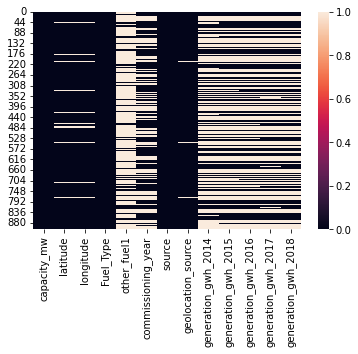

In [17]:
sns.heatmap(Data.isnull());

White lines is heat map show missing values in dataset

In [18]:
Data.skew().sort_values()

commissioning_year    -1.067949
latitude              -0.145866
longitude              1.112646
capacity_mw            3.123576
generation_gwh_2014    3.342707
generation_gwh_2018    3.476298
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2015    3.665904
dtype: float64

### Treating null values 
Checking the mean and mode values of the features having null values, so that we can fill the null values

In [19]:
Data['latitude'].mean()

21.19791811846691

In [20]:
Data['other_fuel1'].mode()

0    Oil
Name: other_fuel1, dtype: object

In [21]:
Data['geolocation_source'].mode()

0    WRI
Name: geolocation_source, dtype: object

In [22]:
Data["latitude"] = Data["latitude"].fillna(Data["latitude"].mean())
Data["other_fuel1"] = Data["other_fuel1"].fillna(Data["other_fuel1"].mode()[0])
Data["geolocation_source"] = Data["geolocation_source"].fillna(Data["geolocation_source"].mode()[0])
Data["longitude"] = Data["longitude"].fillna(Data["longitude"].median())
Data["commissioning_year"] = Data["commissioning_year"].fillna(Data["commissioning_year"].median())
Data["generation_gwh_2014"] = Data["generation_gwh_2014"].fillna(Data["generation_gwh_2014"].median())
Data["generation_gwh_2015"] = Data["generation_gwh_2015"].fillna(Data["generation_gwh_2015"].median())
Data["generation_gwh_2016"] = Data["generation_gwh_2016"].fillna(Data["generation_gwh_2016"].median())
Data["generation_gwh_2017"] = Data["generation_gwh_2017"].fillna(Data["generation_gwh_2017"].median())
Data["generation_gwh_2018"] = Data["generation_gwh_2017"].fillna(Data["generation_gwh_2018"].median())

In [23]:
Data.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
Fuel_Type              0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

We have treated the null values now and the data now shows no null values

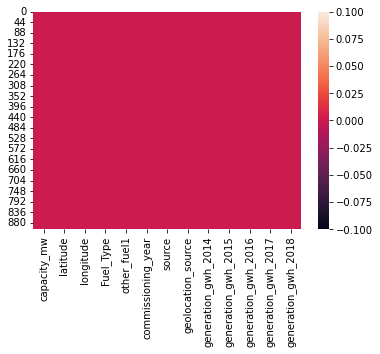

In [24]:
sns.heatmap(Data.isnull());

There are no null values

In [25]:
Data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [26]:
Data["Power_plant_age"] = 2018 - Data["commissioning_year"]
Data.drop(columns=["commissioning_year"], inplace = True)

Here I have extracted Power plant age from commissioning year and dropped commissioning year columns. From Power plant age we can get to know how old are the power plants.

In [27]:
Data.head()

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,817.977250,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,817.977250,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,817.977250,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,663.774500,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,5385.579736,3.0


### Statistical Description of the DataSet

In [28]:
Data.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1657.121797,19.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3046.862910,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,817.977250,15.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,817.977250,17.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,817.977250,20.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35116.000000,91.000000


Here we can see the statistical analysis of the dataset (numerical only)

We can observe that the count of the columns are same, which means the dataset is balanced. The minimum capacity of the power plant is zero and maximum in 4760 and there is huge difference in mean and standard deviation.From the difference between maximum and 75% percentile we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.

In [29]:
cat_col = []
num_col = []
for i in Data.dtypes.index:
    if Data.dtypes[i] =='object':
        cat_col.append(i)
    elif Data.dtypes[i] != 'object':
        num_col.append(i)

In [30]:
cat_col

['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']

In [31]:
num_col

['capacity_mw',
 'latitude',
 'longitude',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'Power_plant_age']

### Data Visualization

### Categorical column Visualization

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64


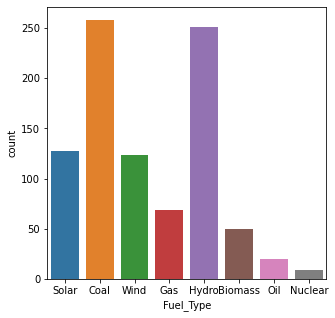

In [32]:
print(Data['Fuel_Type'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(Data['Fuel_Type']);

we can see that the 'Coal' energy source is used the highest in the generation of electricity. Then the next energy source used is the 'HydroBiomass' and followed by the other energy sources.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


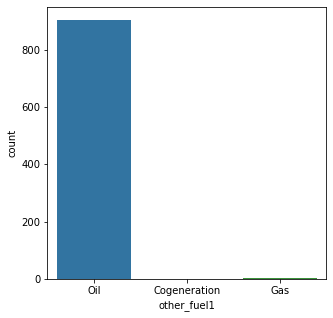

In [33]:
print(Data['other_fuel1'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(Data['other_fuel1'])
plt.show()

It can be observed that 'other_fuel1' type has 3 unique types namely: 'Oil', 'Cogeneration other fuel', 'Gas'. And it is clearly seen that oil is the max used fuel type.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


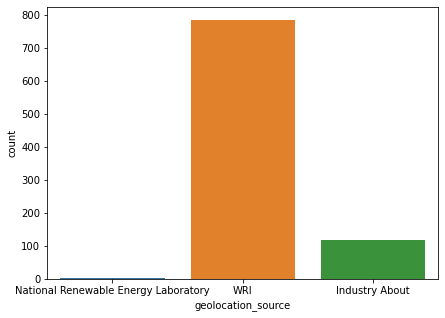

In [34]:
print(Data['geolocation_source'].value_counts())
plt.figure(figsize=(7,5))
sns.countplot(Data['geolocation_source']);

Here it can be seen that the count of WRI is the max, which means that the max information is shared by this source.

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


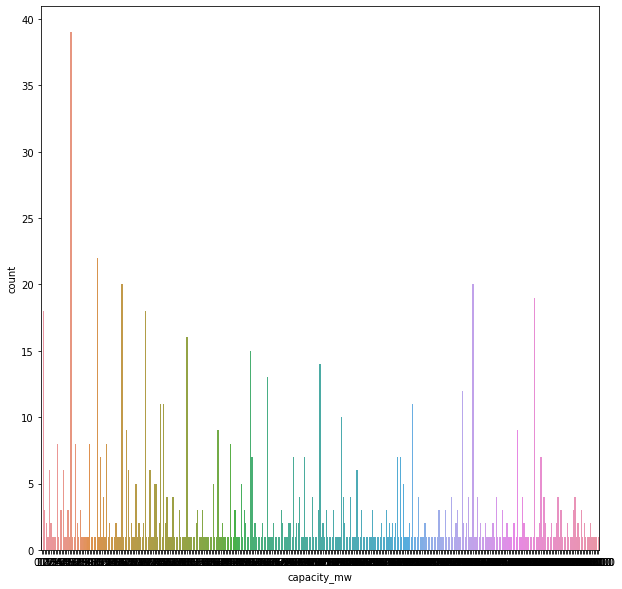

In [35]:
print(Data['capacity_mw'].value_counts())   
plt.figure(figsize=(10,10))
sns.countplot(Data['capacity_mw']);

### Numerical Column

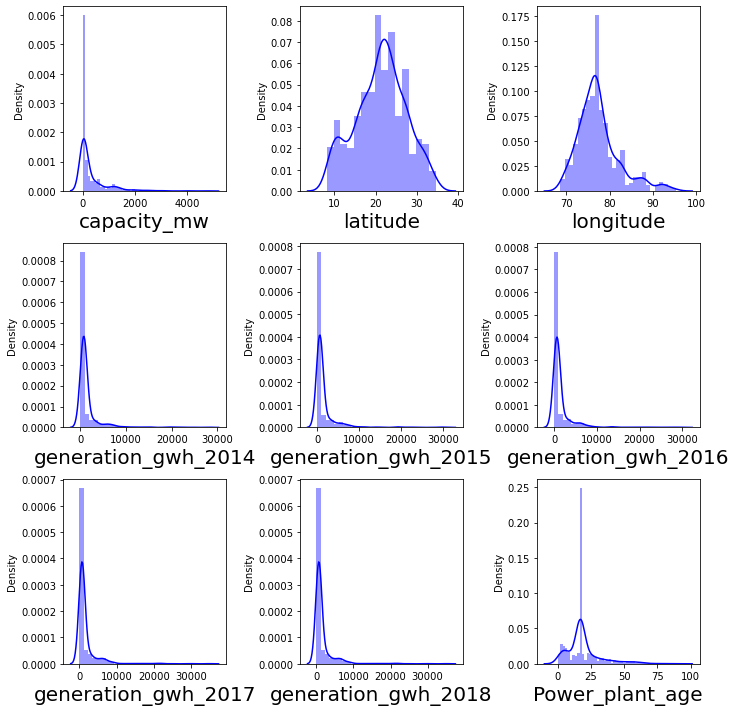

In [36]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(Data[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Here in the plots we can see that the data is not normally distributed. Outliers and skewness is present, which needs to be treated.

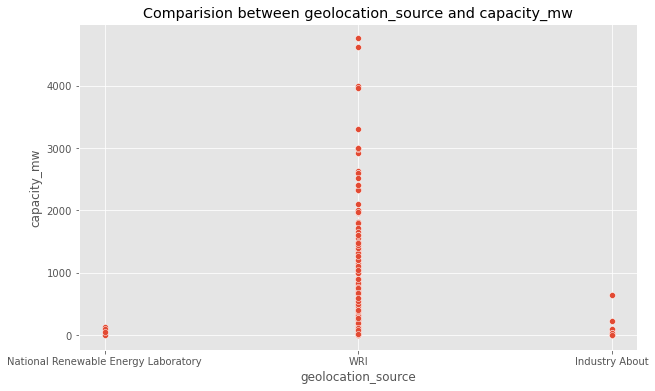

In [37]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between geolocation_source and capacity_mw')
sns.scatterplot(Data['geolocation_source'],Data["capacity_mw"]);

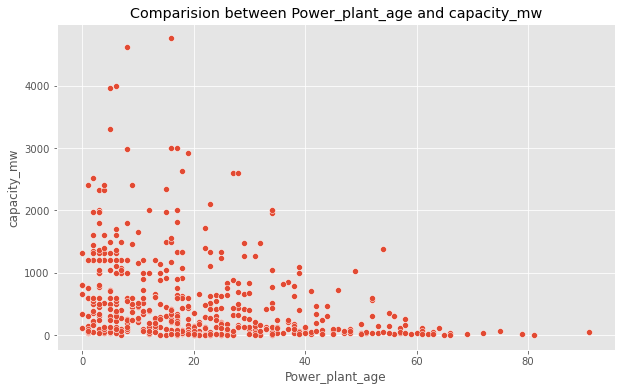

In [38]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.scatterplot(Data['Power_plant_age'],Data["capacity_mw"]);

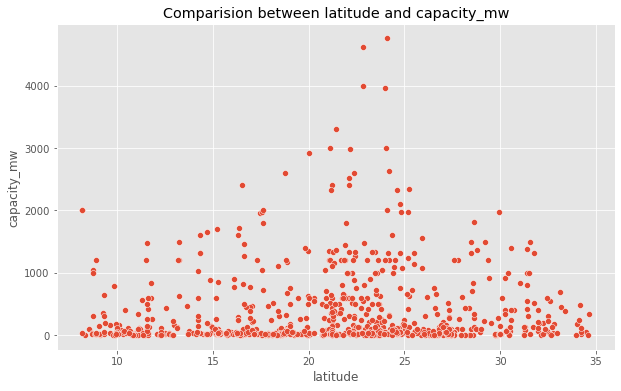

In [39]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(Data['latitude'],Data["capacity_mw"]);

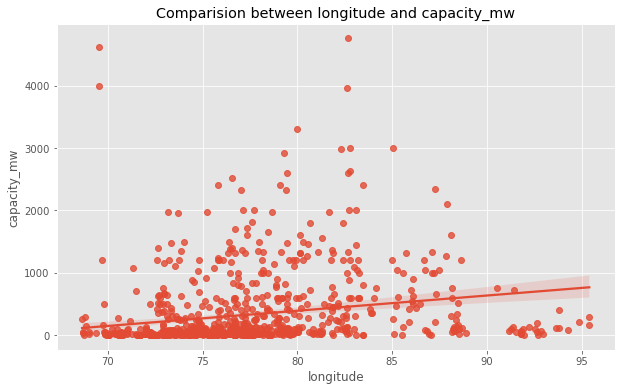

In [40]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(Data['longitude'],Data["capacity_mw"]);

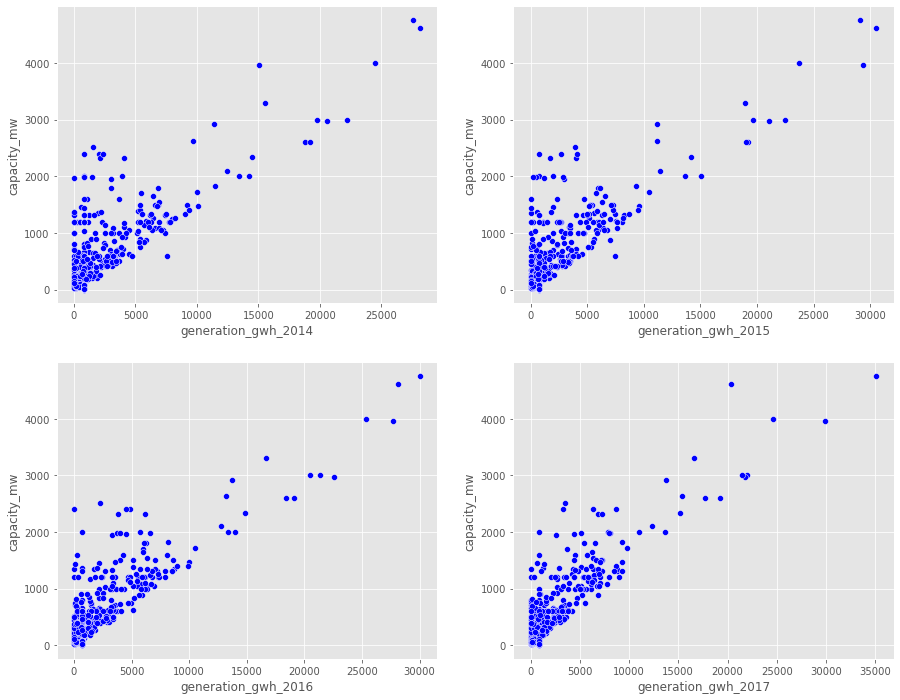

In [41]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2014 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=Data,color="b")

#Checking the relation between feature generation_gwh_2015 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=Data,color="b")

#Checking the relation between feature generation_gwh_2016 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=Data,color="b")

#Checking the relation between feature generation_gwh_2017 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=Data,color="b")
plt.show()

This features shows a positive corelation. Here the electricity generation reported for the years has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

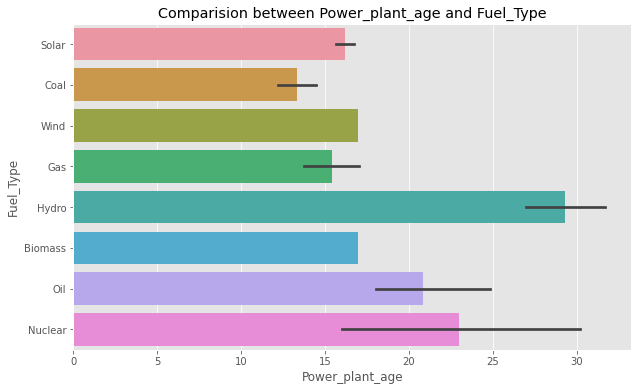

In [42]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and Fuel_Type')
sns.barplot(Data['Power_plant_age'],Data["Fuel_Type"]);

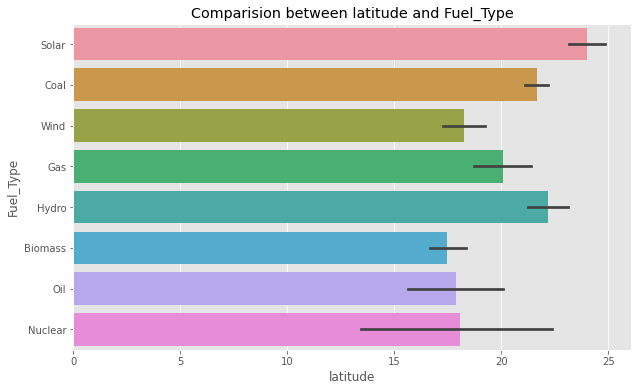

In [43]:
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and Fuel_Type')
sns.barplot(Data['latitude'],Data["Fuel_Type"]);

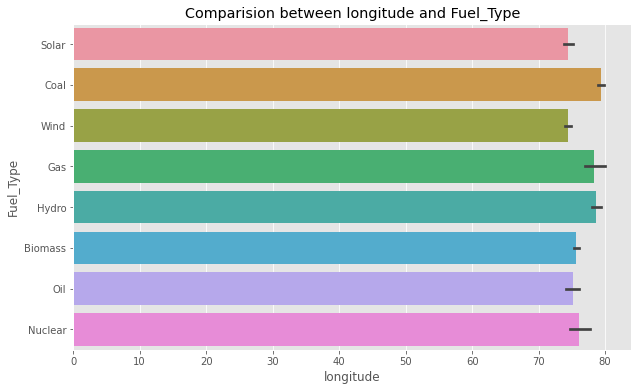

In [44]:
plt.figure(figsize=[10,6])
plt.title('Comparision between longitude and Fuel_Type')
sns.barplot(Data['longitude'],Data["Fuel_Type"]);

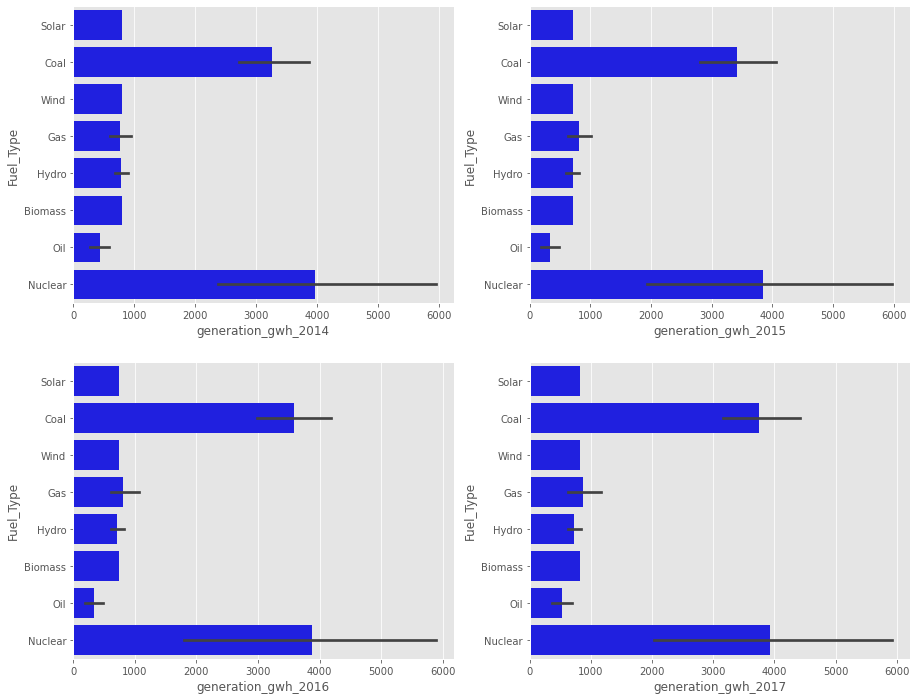

In [45]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2014 and targer Fuel_Type
sns.barplot(x='generation_gwh_2014',y='Fuel_Type',ax=axes[0,0],data=Data,color="b")

#Checking the relation between feature generation_gwh_2015 and targer Fuel_Type
sns.barplot(x='generation_gwh_2015',y='Fuel_Type',ax=axes[0,1],data=Data,color="b")

#Checking the relation between feature generation_gwh_2016 and targer Fuel_Type
sns.barplot(x='generation_gwh_2016',y='Fuel_Type',ax=axes[1,0],data=Data,color="b")

#Checking the relation between feature generation_gwh_2017 and targer Fuel_Type
sns.barplot(x='generation_gwh_2017',y='Fuel_Type',ax=axes[1,1],data=Data,color="b")
plt.show()

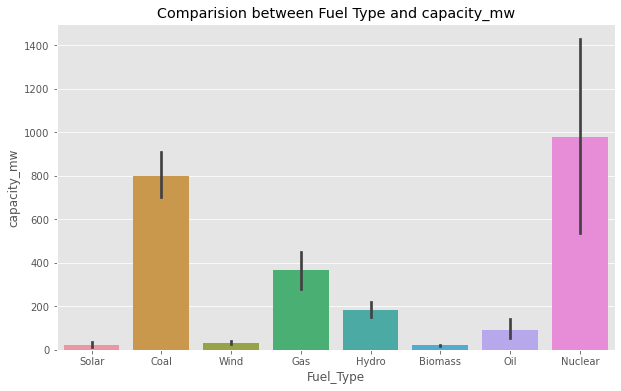

In [46]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x = "Fuel_Type", y = "capacity_mw", data = Data)
plt.show()

Here also it shows that energy source Nuclear has shown the major contribution

### Label Encoding

In [47]:
categorical_col = ['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']

In [48]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Data[categorical_col] = Data[categorical_col].apply(LE.fit_transform)

In [49]:
Data[categorical_col]

,Fuel_Type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


### Identifying the outliers

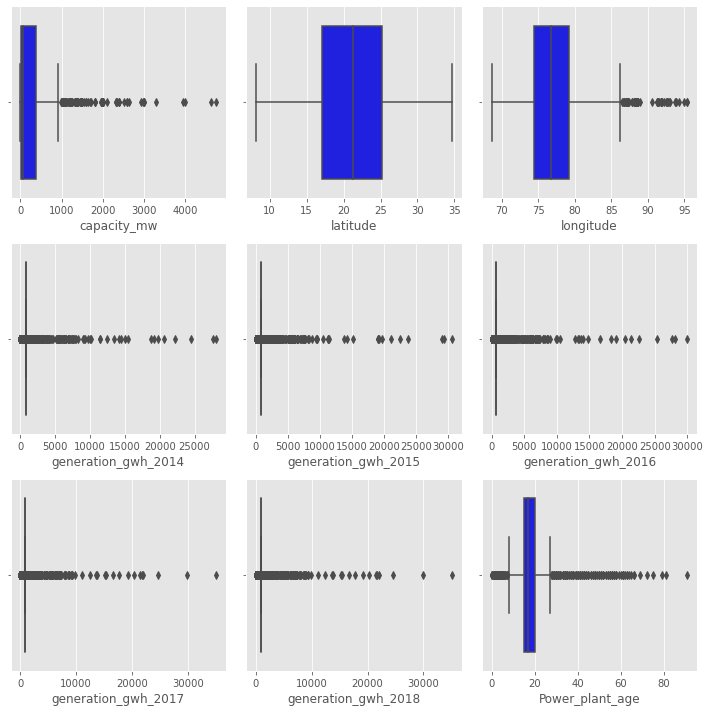

In [50]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(Data[column],color="blue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In the boxplot we can notice the outliers present in all the columns except latitude. Even target column has outliers but no need to remove it. Let's remove outliers using Zscore method

In [51]:
features = Data[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018','Power_plant_age']]

In [52]:
import scipy as stats
from scipy.stats import zscore
z=np.abs(zscore(features))

z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,0.869917,0.257022,0.267783,0.275737,0.275565,0.275565,0.933076
1,0.585590,0.257022,0.267783,0.275737,0.275565,0.275565,0.172699
2,1.673567,0.257022,0.267783,0.275737,0.275565,0.275565,0.172699
3,2.895239,0.322873,0.223348,0.226194,0.326203,0.326203,0.400812
4,1.035238,0.545554,1.476964,1.557432,1.224379,1.224379,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.257022,0.505833,0.443415,0.259992,0.259992,1.313265
903,0.153415,0.257022,0.267783,0.275737,0.275565,0.275565,0.172699
904,0.383592,0.257022,0.267783,0.275737,0.275565,0.275565,0.172699
905,0.764564,0.257022,0.267783,0.275737,0.275565,0.275565,0.172699


In [53]:
new_data = Data[(z<3).all(axis=1)] 
new_data

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,817.977250,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,817.977250,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,817.977250,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,663.774500,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,5385.579736,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,865.400000,2.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,817.977250,17.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,817.977250,17.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,817.977250,17.0


In [54]:
cor = new_data.corr()
cor

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050048,0.257383,-0.398217,-0.001441,-0.275072,0.233871,0.615801,0.674601,0.748505,0.792419,0.792419,-0.245110
latitude,0.050048,1.000000,-0.014135,-0.002573,0.037050,0.069413,-0.203314,0.081653,0.071346,0.057236,0.070829,0.070829,-0.096958
longitude,0.257383,-0.014135,1.000000,-0.383326,0.029222,-0.235970,0.263930,0.119811,0.154708,0.196012,0.197348,0.197348,-0.080772
Fuel_Type,-0.398217,-0.002573,-0.383326,1.000000,0.006395,0.039112,-0.478753,-0.250588,-0.276529,-0.287871,-0.290991,-0.290991,0.075706
other_fuel1,-0.001441,0.037050,0.029222,0.006395,1.000000,0.028433,-0.022798,-0.000491,0.006114,0.015561,0.011987,0.011987,-0.058132
source,-0.275072,0.069413,-0.235970,0.039112,0.028433,1.000000,-0.498012,-0.141798,-0.156488,-0.159255,-0.157090,-0.157090,-0.074509
geolocation_source,0.233871,-0.203314,0.263930,-0.478753,-0.022798,-0.498012,1.000000,0.113695,0.125473,0.127691,0.125956,0.125956,0.050944
generation_gwh_2014,0.615801,0.081653,0.119811,-0.250588,-0.000491,-0.141798,0.113695,1.000000,0.912174,0.800971,0.743005,0.743005,-0.060584
generation_gwh_2015,0.674601,0.071346,0.154708,-0.276529,0.006114,-0.156488,0.125473,0.912174,1.000000,0.907191,0.825737,0.825737,-0.130635
generation_gwh_2016,0.748505,0.057236,0.196012,-0.287871,0.015561,-0.159255,0.127691,0.800971,0.907191,1.000000,0.931186,0.931186,-0.201005


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'capacity_mw'),
  Text(0, 1.5, 'latitude'),
  Text(0, 2.5, 'longitude'),
  Text(0, 3.5, 'Fuel_Type'),
  Text(0, 4.5, 'other_fuel1'),
  Text(0, 5.5, 'source'),
  Text(0, 6.5, 'geolocation_source'),
  Text(0, 7.5, 'generation_gwh_2014'),
  Text(0, 8.5, 'generation_gwh_2015'),
  Text(0, 9.5, 'generation_gwh_2016'),
  Text(0, 10.5, 'generation_gwh_2017'),
  Text(0, 11.5, 'generation_gwh_2018'),
  Text(0, 12.5, 'Power_plant_age')])

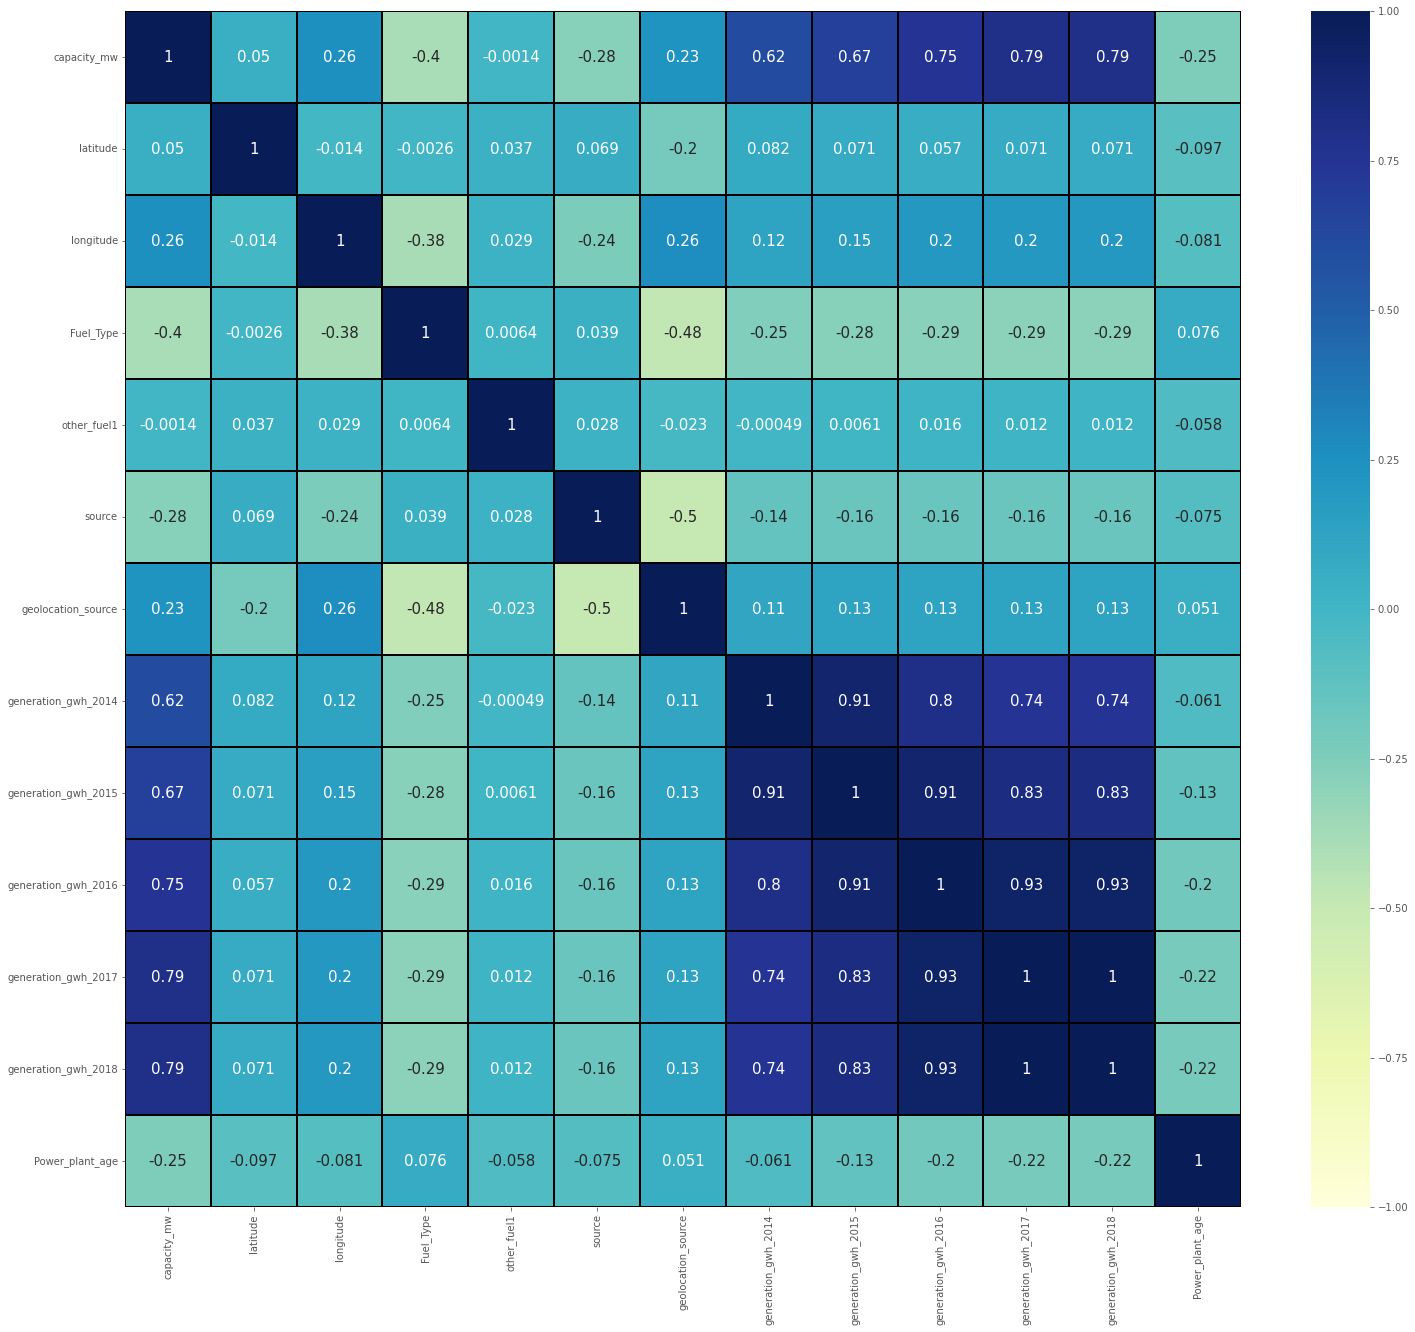

In [55]:
plt.figure(figsize=(25,22))
sns.heatmap(new_data.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

Here we can see the co-relation between all the features and the features and targets

The label capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014. 
And the label is negatively correlated with the features Fuel_Type, source and Power_plant_age. The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

The label Fuel_Type is less correlated with Power_plant_age and source. The label is negatively correlated with geolocation_source, longitude, capacity_mw, and all generation_gwh years.

From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearity problem. So will try to solve this problem by Checking VIF value before building our models.

Also the features other_fuel1 and latitude have very very less correlation with both the labels. Let's drop those columns.

### Visualizing the correlation using bar plot

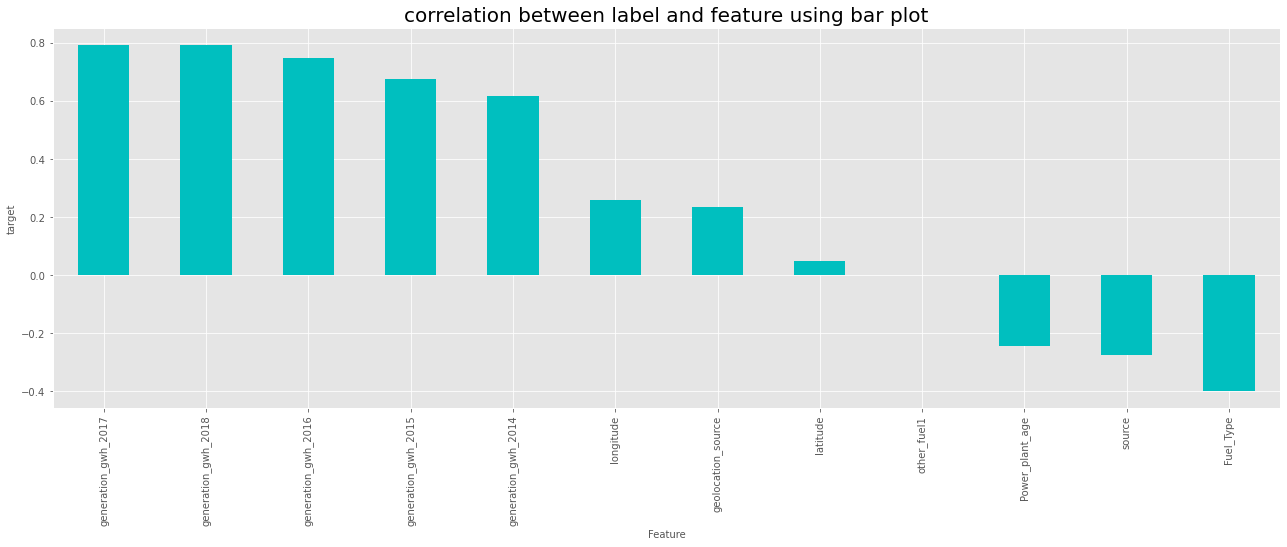

In [56]:
plt.figure(figsize=(22,7))
new_data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

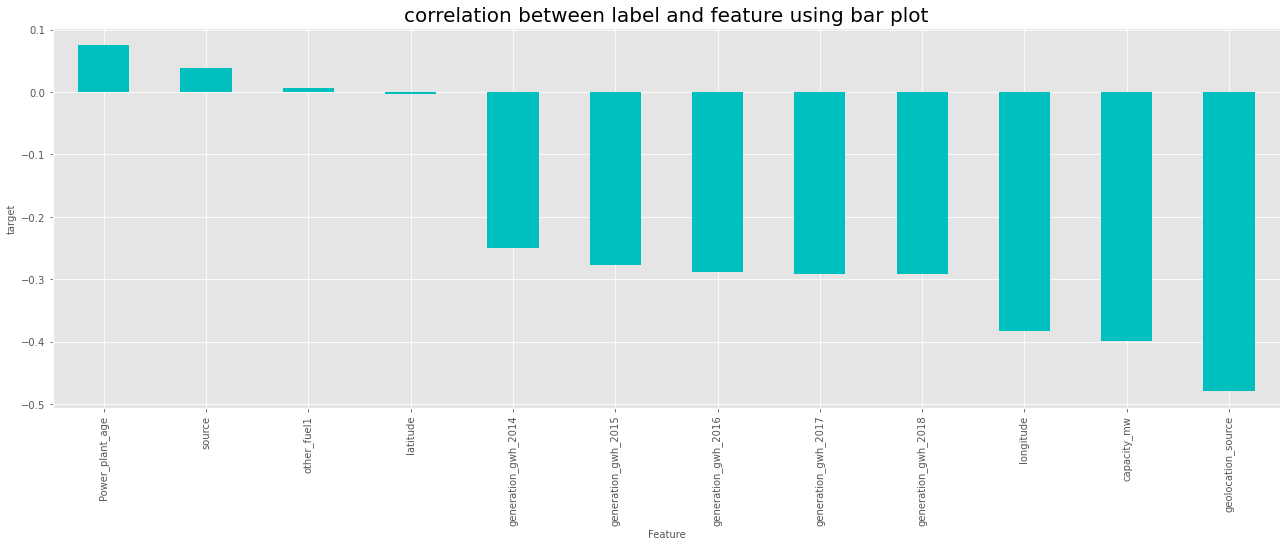

In [57]:
plt.figure(figsize=(22,7))
new_data.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [58]:
new_data.drop('other_fuel1',axis=1,inplace=True)
new_data.drop('latitude',axis=1,inplace=True)
new_data.head()

,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,817.977250,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,817.977250,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,817.977250,17.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,663.774500,14.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,5385.579736,3.0


### Seperating the features and target variable

In [59]:
X = new_data.drop('capacity_mw',axis=1)
Y = new_data['capacity_mw']

### Checking for skewness

In [60]:
X.skew().sort_values()

geolocation_source    -2.068499
Fuel_Type              0.415658
longitude              0.944167
Power_plant_age        1.279935
source                 1.736117
generation_gwh_2017    2.531497
generation_gwh_2018    2.531497
generation_gwh_2016    2.634502
generation_gwh_2015    2.714849
generation_gwh_2014    2.941090
dtype: float64

The following columns have skewness more than +0.5 and -0.5.

longitude generation_gwh_2013 generation_gwh_2014 generation_gwh_2015 generation_gwh_2016 generation_gwh_2017 Power_plant_age

### Removing skewness using yeo-johnson method

In [61]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
scaler = PowerTransformer(method='yeo-johnson')

In [62]:
X[skew] = scaler.fit_transform(X[skew].values)
X[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.923108,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,-1.078648
1,-0.500996,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
2,-2.377958,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
3,2.432300,-0.270221,0.092725,0.103688,-0.201197,-0.201197,-0.243520
4,1.261687,1.425934,2.286967,2.272564,1.972624,1.972624,-1.755558


In [63]:
X.skew()

longitude             -0.000209
Fuel_Type              0.415658
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2014    0.231858
generation_gwh_2015    0.163407
generation_gwh_2016    0.145702
generation_gwh_2017    0.126375
generation_gwh_2018    0.126375
Power_plant_age        0.042667
dtype: float64

The skewness has been removed now

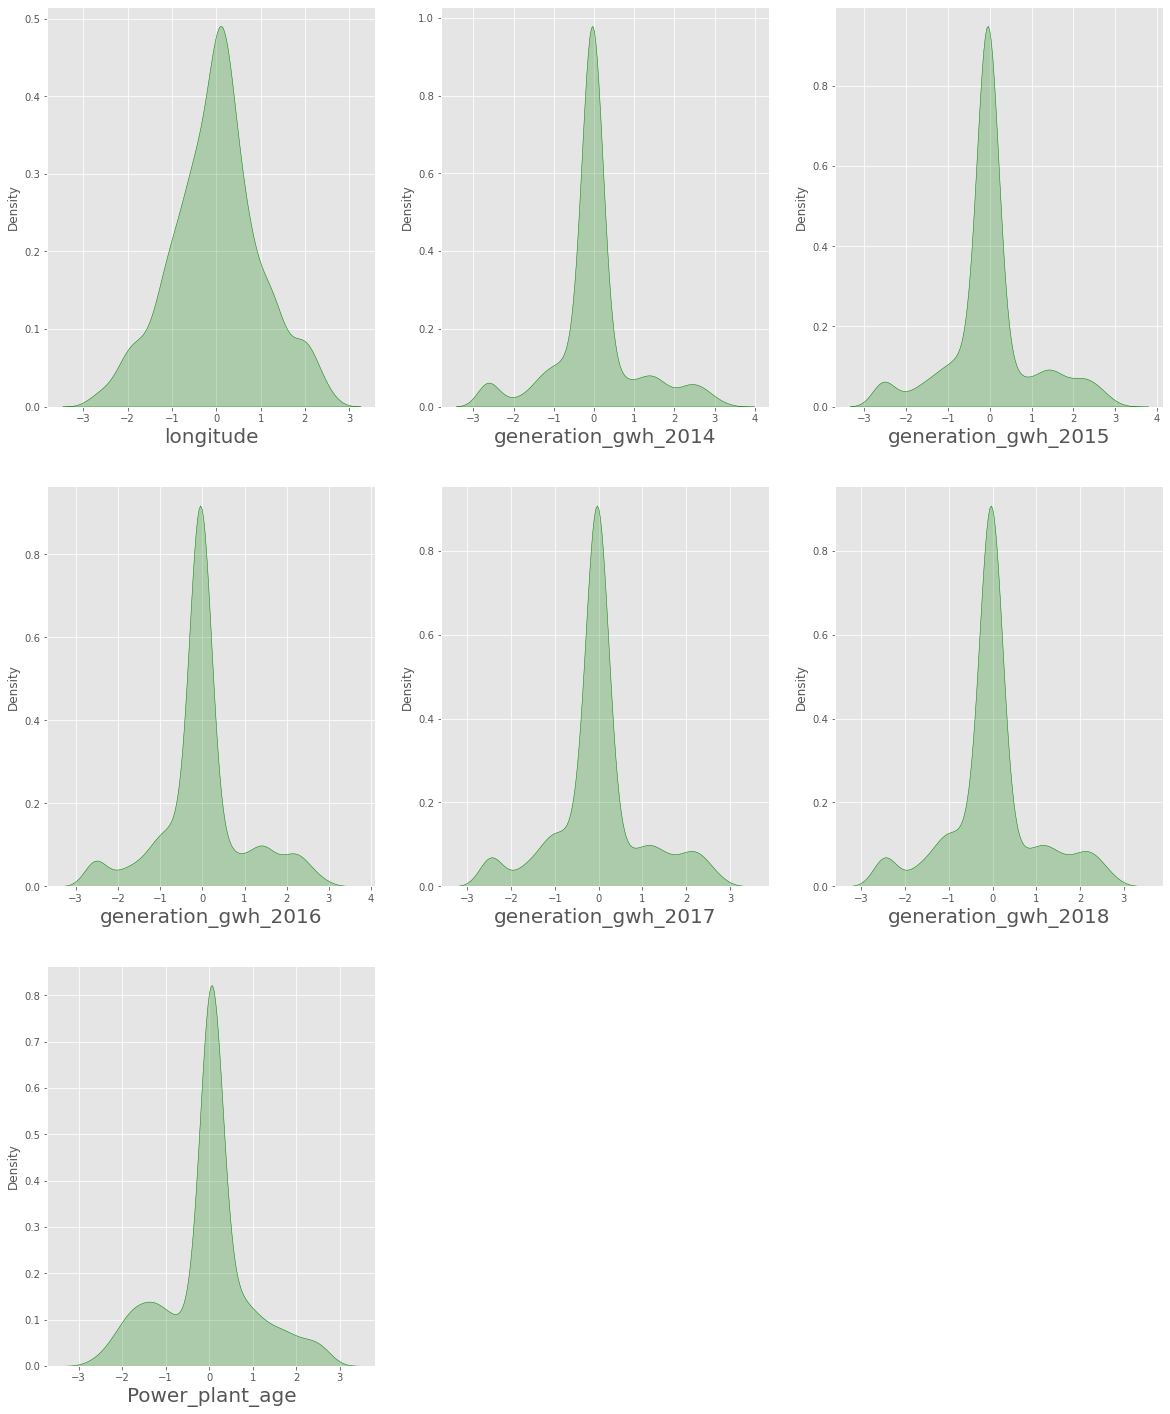

In [64]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(X[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [65]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.923108,1.176685,1.399156,-1.037509,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,-1.078648
1,-0.500996,-0.974679,2.823623,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
2,-2.377958,1.606958,-0.529352,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
3,2.432300,-0.544406,-0.507437,0.406866,-0.270221,0.092725,0.103688,-0.201197,-0.201197,-0.243520
4,1.261687,-0.974679,-0.507437,0.406866,1.425934,2.286967,2.272564,1.972624,1.972624,-1.755558
...,...,...,...,...,...,...,...,...,...,...
847,0.230878,-0.974679,-0.507437,0.406866,-0.045344,-2.461735,-0.843361,0.008697,0.008697,-1.978203
848,0.420621,1.176685,0.697881,-2.481884,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
849,-0.225562,1.606958,-0.529352,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
850,-0.761758,-0.974679,0.303413,0.406866,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221


In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.308042,longitude
1,1.683092,Fuel_Type
2,1.503056,source
3,1.875721,geolocation_source
4,3.592983,generation_gwh_2014
5,6.181058,generation_gwh_2015
6,9.584370,generation_gwh_2016
7,inf,generation_gwh_2017
8,inf,generation_gwh_2018
9,1.102771,Power_plant_age


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
maxAccu=0
maxRS=0
for i in range(1,100): 
    X_train,X_test, Y_train, Y_test =train_test_split(X,Y, test_size=.30,random_state=i)
    RFR = RandomForestRegressor()
    RFR.fit(X_train, Y_train)
    pred_RFR=RFR.predict(X_test)
    acc=r2_score(Y_test,pred_RFR)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.8528550821437031 Random_State 2


### Train_Test_Split

In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=maxRS)

### Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(X_train,Y_train)
# [Prediction]
predLR = LR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predLR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predLR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predLR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predLR)))


R2 Score: 0.6350722431196107
Mean Absolute Error 195.2581974050927
Mean Squared Error 68806.48202845638
Root Mean Squared Error 262.3098969319617


### Random Forest Regressor

In [70]:
RFR = RandomForestRegressor()
RFR.fit(X_train,Y_train)
# [Prediction]
predRFR = RFR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predRFR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predRFR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predRFR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predRFR)))


R2 Score: 0.842452956733015
Mean Absolute Error 96.59384694717639
Mean Squared Error 29705.215886714
Root Mean Squared Error 172.35201155401117


### GradientBoostingRegressor

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(X_train,Y_train)

# [Prediction]
predGB = GB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predGB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predGB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predGB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predGB)))


R2 Score: 0.7998203062705975
Mean Absolute Error 109.85173731725769
Mean Squared Error 37743.52660044044
Root Mean Squared Error 194.27693275435567


### Bagging Regressor

In [72]:
from sklearn.ensemble import BaggingRegressor
BR = BaggingRegressor()
BR.fit(X_train,Y_train)

# [Prediction]
predBR = BR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predBR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predBR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predBR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predBR)))

R2 Score: 0.8236350916448734
Mean Absolute Error 99.63009281536065
Mean Squared Error 33253.291010047324
Root Mean Squared Error 182.35484915418982


In [73]:
from sklearn.model_selection import cross_val_score

# Checking cv score for Linear Regression
print('Linear Regression -->',cross_val_score(LR,X,Y,cv=5).mean())

# Checking cv score for Random Forest Regressor
print('Random Forest Regressor -->',cross_val_score(RFR,X,Y,cv=5).mean())

#Checking the cv score for GradientBoostingRegressor
print('GradientBoostingRegressor -->',cross_val_score(GB,X,Y,cv=5).mean())

#Checking the cv score for BaggingRegressor
print('BaggingRegressor -->',cross_val_score(BR,X,Y,cv=5).mean())

Linear Regression --> 0.5405281296631363
Random Forest Regressor --> 0.7593240627799848
GradientBoostingRegressor --> 0.7327924664931201
BaggingRegressor --> 0.7176672259034682


From the above observation, the difference between R2 score and the cross validation score we conclude that Random Forest Regressor as our best fitting model. Let's increse the accuracy of the model by usiing hyper parameter tuning.

### Hyper Parameter Tuning for the model with best acc and cv score

In [74]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [75]:
from sklearn.model_selection import GridSearchCV
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [76]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

In [79]:
capacity_mw = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=200)
capacity_mw.fit(X_train, Y_train)
pred = capacity_mw.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Y_test, predRFR)))

R2_Score: 85.43541206987723
Root Mean Squared Error: 172.35201155401117


### Saving the model

In [80]:
import joblib
joblib.dump(capacity_mw,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

In [81]:
X_data = new_data.drop("Fuel_Type", axis=1)
Y_data = new_data["Fuel_Type"]

In [82]:
X_data.skew().sort_values()

geolocation_source    -2.068499
longitude              0.944167
Power_plant_age        1.279935
source                 1.736117
capacity_mw            2.185823
generation_gwh_2017    2.531497
generation_gwh_2018    2.531497
generation_gwh_2016    2.634502
generation_gwh_2015    2.714849
generation_gwh_2014    2.941090
dtype: float64

We can see that there are skewness in most of the columns

In [83]:
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [84]:
X_data[skew] = scaler.fit_transform(X_data[skew].values)
X_data[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677574,-0.923108,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,-1.078648
1,0.218008,-0.500996,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
2,-0.275959,-2.377958,-0.045344,-0.050236,-0.047960,-0.037222,-0.037222,0.048221
3,0.389127,2.432300,-0.270221,0.092725,0.103688,-0.201197,-0.201197,-0.243520
4,1.726747,1.261687,1.425934,2.286967,2.272564,1.972624,1.972624,-1.755558


In [85]:
X_data.skew().sort_values()

geolocation_source    -2.068499
longitude             -0.000209
capacity_mw            0.016478
Power_plant_age        0.042667
generation_gwh_2017    0.126375
generation_gwh_2018    0.126375
generation_gwh_2016    0.145702
generation_gwh_2015    0.163407
generation_gwh_2014    0.231858
source                 1.736117
dtype: float64

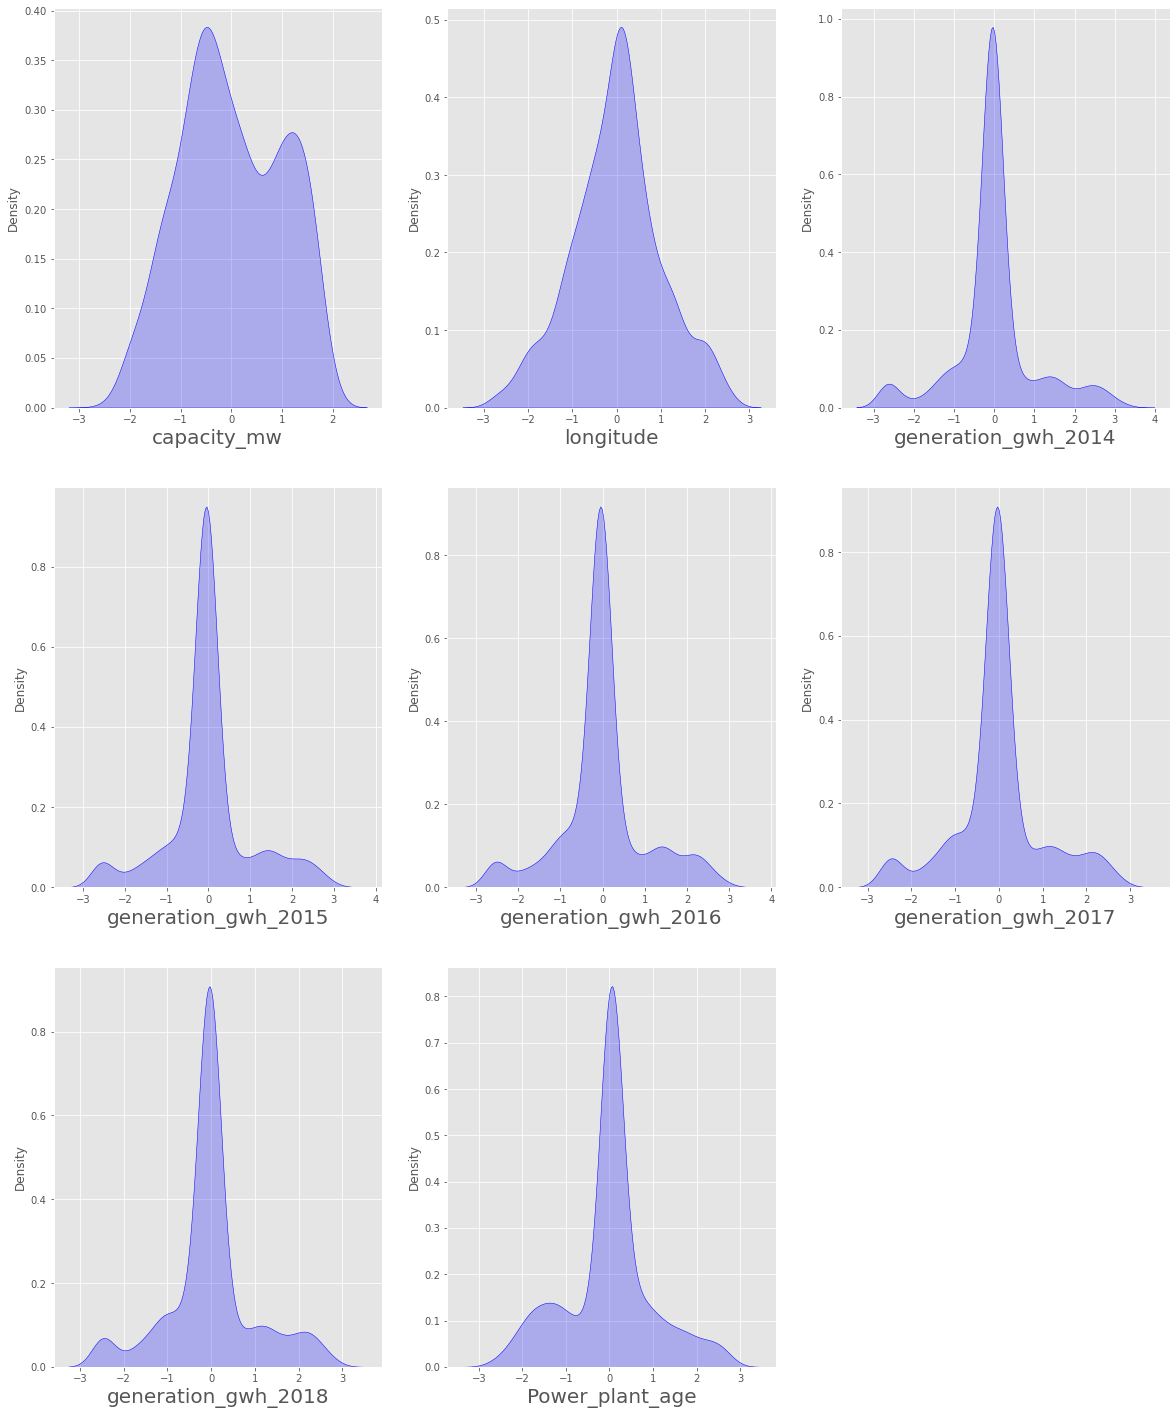

In [86]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X_data[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(X_data[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Feature Scalling

In [87]:
X_data = pd.DataFrame(scaler.fit_transform(X_data),columns=X_data.columns)
X_data

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.702140,-0.923115,1.529136,-2.242737,-0.017061,-0.024923,-0.023560,-0.015896,-0.015896,-1.078091
1,0.231674,-0.501122,1.982857,0.408766,-0.017061,-0.024923,-0.023560,-0.015896,-0.015896,0.046555
2,-0.262842,-2.377227,-0.487830,0.408766,-0.017061,-0.024923,-0.023560,-0.015896,-0.015896,0.046555
3,0.401000,2.433064,-0.421290,0.408766,-0.245403,0.118016,0.127973,-0.181226,-0.181226,-0.245046
4,1.701555,1.261811,-0.421290,0.408766,1.394934,2.192532,2.183118,1.915450,1.915450,-1.752032
...,...,...,...,...,...,...,...,...,...,...
847,1.644959,0.230708,-0.421290,0.408766,-0.017061,-2.589197,-0.841533,0.030109,0.030109,-1.973509
848,-1.619851,0.420479,1.159872,-2.452783,-0.017061,-0.024923,-0.023560,-0.015896,-0.015896,0.046555
849,-0.498558,-0.225732,-0.487830,0.408766,-0.017061,-0.024923,-0.023560,-0.015896,-0.015896,0.046555
850,0.123405,-0.761816,0.857313,0.408766,-0.017061,-0.024923,-0.023560,-0.015896,-0.015896,0.046555


In [88]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_data.values,i)
              for i in range(len(X_data.columns))]
vif["Features"] = X_data.columns

# Let's check the values
vif

,VIF values,Features
0,1.749590,capacity_mw
1,1.192135,longitude
2,1.238479,source
3,1.503540,geolocation_source
4,3.425693,generation_gwh_2014
5,5.811036,generation_gwh_2015
6,9.075229,generation_gwh_2016
7,inf,generation_gwh_2017
8,inf,generation_gwh_2018
9,1.151269,Power_plant_age


We have seen that all the columns has vif values less then 10, hence there is no multicolinearity that exist.

In [89]:
Y_data.value_counts()

1    239
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: Fuel_Type, dtype: int64

We can see that the targer Fuel_Type has multiple classes in the mode of energy source, hence we can see that this is a multi classification problem. As the data between the classes are not balance with 1 having 240 counys and 4 having only 9 counts, we have to do oversampling of the data.

### OverSampling

In [92]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_data, Y_data = sm.fit_resample(X_data,Y_data)

In [93]:
Y_data.value_counts()

6    239
1    239
7    239
2    239
3    239
0    239
5    239
4    239
Name: Fuel_Type, dtype: int64

In [94]:
X_data.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.702140,-0.923115,1.529136,-2.242737,-0.017061,-0.024923,-0.023560,-0.015896,-0.015896,-1.078091
1,0.231674,-0.501122,1.982857,0.408766,-0.017061,-0.024923,-0.023560,-0.015896,-0.015896,0.046555
2,-0.262842,-2.377227,-0.487830,0.408766,-0.017061,-0.024923,-0.023560,-0.015896,-0.015896,0.046555
3,0.401000,2.433064,-0.421290,0.408766,-0.245403,0.118016,0.127973,-0.181226,-0.181226,-0.245046
4,1.701555,1.261811,-0.421290,0.408766,1.394934,2.192532,2.183118,1.915450,1.915450,-1.752032


### Model

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
maxAccu=0
maxRS=0

for i in range(1,200):
    X_data_train,X_data_test, Y_data_train, Y_data_test=train_test_split(X_data,Y_data,test_size=.30, random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(X_data_train,Y_data_train)
    predRFC=RFC.predict(X_data_test)
    acc=accuracy_score(Y_data_test,predRFC)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS) 

Best accuracy is  0.9407665505226481  on Random_state  142


In [103]:
X_data_train,X_data_test,Y_data_train,Y_data_test=train_test_split(X_data,Y_data,test_size=.30,random_state=maxRS)

### Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
LOR = LogisticRegression()
LOR.fit(X_data_train,Y_data_train)
# [Prediction]
predLOR = LOR.predict(X_data_test)
print('R2 Score:',r2_score(Y_data_test,predLOR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_data_test,predLOR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_data_test,predLOR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_data_test,predLOR)))

print("-----------------------------------------------------")
# Accuracy Score
print(accuracy_score(Y_data_test, predLOR))
print("-----------------------------------------------------")
# Confusion Matrix
print(confusion_matrix(Y_data_test, predLOR))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_data_test,predLOR))

R2 Score: 0.38909952498972067
Mean Absolute Error 0.8641114982578397
Mean Squared Error 3.264808362369338
Root Mean Squared Error 1.8068780706980032
-----------------------------------------------------
0.6881533101045296
-----------------------------------------------------
[[59  0  0  1  0  0  0  7]
 [11 23  6  5 11  1  0  3]
 [ 5  9 24 14 10  6  0  1]
 [ 0  7  5 27  8  6  0 11]
 [ 0  5  0  1 62  1  0  0]
 [19  1  4  1  0 50  0  4]
 [ 0  1  0  0  0  0 82  0]
 [ 0  0  0 15  0  0  0 68]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.88      0.73        67
           1       0.50      0.38      0.43        60
           2       0.62      0.35      0.44        69
           3       0.42      0.42      0.42        64
           4       0.68      0.90      0.78        69
           5       0.78      0.63      0.70        79
           6       1.00      0.99      0.99        83
           7       0

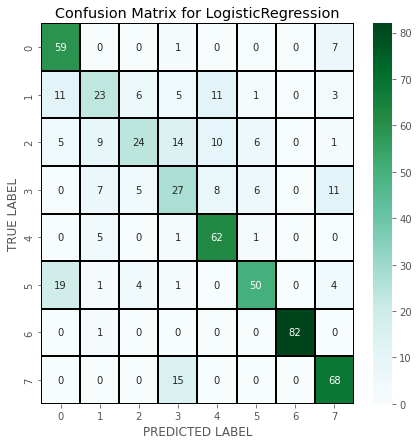

In [111]:
cm = confusion_matrix(Y_data_test,predlog)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

### Random Forest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(X_data_train,Y_data_train)

# [Prediction]
predRFC = RFC.predict(X_data_test)
print('R2 Score:',r2_score(Y_data_test,predRFC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_data_test,predRFC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_data_test,predRFC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_data_test,predRFC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_data_test, predRFC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_data_test, predRFC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_data_test,predRFC))

R2 Score: 0.919481100679008
Mean Absolute Error 0.15156794425087108
Mean Squared Error 0.43031358885017423
Root Mean Squared Error 0.6559829181085238
-----------------------------------------------------
Accuracy Score:  0.9320557491289199
-----------------------------------------------------
Confusion Matrix:
 [[67  0  0  0  0  0  0  0]
 [ 4 44  2  5  4  1  0  0]
 [ 2  1 62  1  1  1  0  1]
 [ 0  2  5 56  0  1  0  0]
 [ 0  0  0  0 69  0  0  0]
 [ 1  3  3  0  0 71  0  1]
 [ 0  0  0  0  0  0 83  0]
 [ 0  0  0  0  0  0  0 83]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        67
           1       0.88      0.73      0.80        60
           2       0.86      0.90      0.88        69
           3       0.90      0.88      0.89        64
           4       0.93      1.00      0.97        69
           5       0.96      0.90      0.93        79
           6       1.00      1.00    

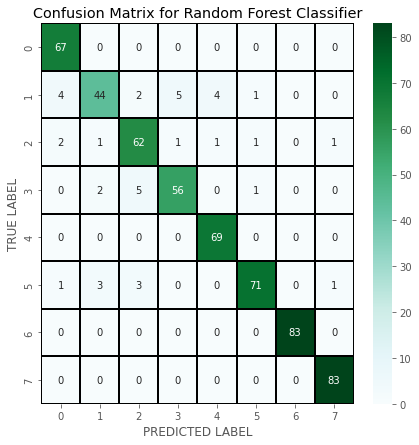

In [133]:
cm = confusion_matrix(Y_data_test,predRFC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

### Decision Tree Classifier

In [122]:
from sklearn.tree import DecisionTreeClassifier

# Checking accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(X_data_train,Y_data_train)

# [Prediction]
predDTC = DTC.predict(X_data_test)
print('R2 Score:',r2_score(Y_data_test,predDTC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_data_test,predDTC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_data_test,predDTC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_data_test,predDTC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_data_test, predDTC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_data_test, predDTC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_data_test,predDTC)) 

R2 Score: 0.8924241426075815
Mean Absolute Error 0.2229965156794425
Mean Squared Error 0.5749128919860628
Root Mean Squared Error 0.7582301049061971
-----------------------------------------------------
Accuracy Score:  0.8885017421602788
-----------------------------------------------------
Confusion Matrix:
 [[64  3  0  0  0  0  0  0]
 [ 2 41  2 12  2  1  0  0]
 [ 0  3 56  7  1  2  0  0]
 [ 0  3  2 53  4  2  0  0]
 [ 0  1  0  4 64  0  0  0]
 [ 2  3  8  0  0 66  0  0]
 [ 0  0  0  0  0  0 83  0]
 [ 0  0  0  0  0  0  0 83]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.76      0.68      0.72        60
           2       0.82      0.81      0.82        69
           3       0.70      0.83      0.76        64
           4       0.90      0.93      0.91        69
           5       0.93      0.84      0.88        79
           6       1.00      1.00     

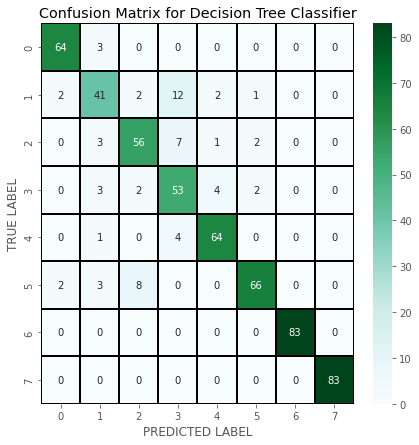

In [132]:
cm = confusion_matrix(Y_data_test,predDTC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### Support Vector Machine Classifier

In [130]:
from sklearn.svm import SVC

# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(X_data_train,Y_data_train)

# [Prediction]
predsvc = svc.predict(X_data_test)
print('R2 Score:',r2_score(Y_data_test,predsvc))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_data_test,predsvc))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_data_test,predsvc))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_data_test,predsvc)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_data_test, predsvc))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_data_test, predsvc))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_data_test,predsvc)) 

R2 Score: 0.7320383188588849
Mean Absolute Error 0.40418118466898956
Mean Squared Error 1.4320557491289199
Root Mean Squared Error 1.1966853175036953
-----------------------------------------------------
Accuracy Score:  0.8397212543554007
-----------------------------------------------------
Confusion Matrix:
 [[65  0  0  0  0  0  0  2]
 [11 26  7  2  9  3  0  2]
 [ 2  3 50  2  3  6  0  3]
 [ 0  4  9 38  3  1  0  9]
 [ 0  0  0  1 68  0  0  0]
 [ 4  0  0  0  0 71  0  4]
 [ 0  0  0  0  0  0 83  0]
 [ 0  0  2  0  0  0  0 81]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        67
           1       0.79      0.43      0.56        60
           2       0.74      0.72      0.73        69
           3       0.88      0.59      0.71        64
           4       0.82      0.99      0.89        69
           5       0.88      0.90      0.89        79
           6       1.00      1.00    

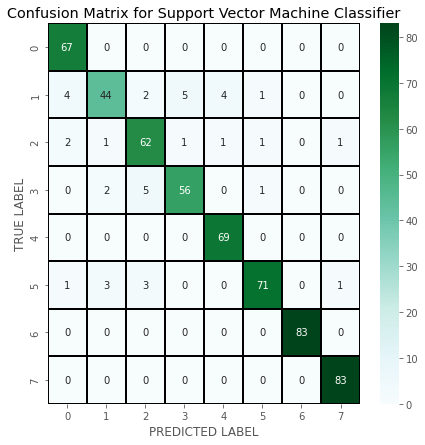

In [131]:
cm = confusion_matrix(Y_data_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

### GradientBoosting Classifier

In [127]:
from sklearn.ensemble import GradientBoostingClassifier
# Checking accuracy for GradientBoosting Classifier
GBC = GradientBoostingClassifier()
GBC.fit(X_data_train,Y_data_train)

# [Prediction]
predGBC = GBC.predict(X_data_test)
print('R2 Score:',r2_score(Y_data_test,predGBC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_data_test,predGBC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_data_test,predGBC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_data_test,predGBC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_data_test, predGBC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_data_test, predGBC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_data_test,predGBC)) 

R2 Score: 0.926978811951813
Mean Absolute Error 0.14634146341463414
Mean Squared Error 0.3902439024390244
Root Mean Squared Error 0.6246950475544243
-----------------------------------------------------
Accuracy Score:  0.9285714285714286
-----------------------------------------------------
Confusion Matrix:
 [[66  1  0  0  0  0  0  0]
 [ 4 44  4  3  4  1  0  0]
 [ 2  3 58  3  1  2  0  0]
 [ 0  3  2 59  0  0  0  0]
 [ 0  0  0  0 68  1  0  0]
 [ 1  3  3  0  0 72  0  0]
 [ 0  0  0  0  0  0 83  0]
 [ 0  0  0  0  0  0  0 83]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.81      0.73      0.77        60
           2       0.87      0.84      0.85        69
           3       0.91      0.92      0.91        64
           4       0.93      0.99      0.96        69
           5       0.95      0.91      0.93        79
           6       1.00      1.00     

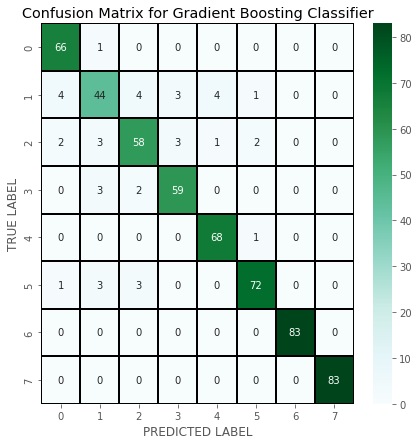

In [128]:
cm = confusion_matrix(Y_data_test,predGBC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

### Cross Validation Score

In [129]:
from sklearn.model_selection import cross_val_score

#cv score for Logistic Regression
print('Logistic Regression',cross_val_score(log,X_data,Y_data,cv=5).mean())

# cv score for Decision Tree Classifier
print('Decision Tree Classifier',cross_val_score(DTC,X_data,Y_data,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier',cross_val_score(RFC,X_data,Y_data,cv=5).mean())

# cv score for Support Vector  Classifier
print('Support Vector  Classifier',cross_val_score(svc,X_data,Y_data,cv=5).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier',cross_val_score(GBC,X_data,Y_data,cv=5).mean())

Logistic Regression 0.6809536177600373
Decision Tree Classifier 0.8608929230516862
Random Forest Classifier 0.9142372835017019
Support Vector  Classifier 0.8054269818052575
Gradient Boosting Classifier 0.8974983937774255


From the accuracy score and cross validation we can see that Random Forest Classifier is the best model.

### HyperParameter Tuning for the model with best score

In [134]:
parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [135]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [136]:
GCV.fit(X_data_train,Y_data_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [137]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [140]:
fuel_type =RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
fuel_type.fit(X_data_train, Y_data_train)
pred = fuel_type.predict(X_data_test)
acc=accuracy_score(Y_data_test,pred)
print('After HyperParameter tuning we have received an accuracy score of',acc*100)

After HyperParameter tuning we have received an accuracy score of 91.28919860627178


### Plotting ROC and compare AUC for the final model

In [141]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

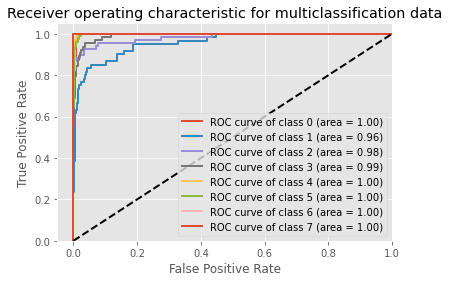

In [144]:
classifier = OneVsRestClassifier(fuel_type)
Y_score = classifier.fit(X_data_train, Y_data_train).predict_proba(X_data_test)

#Binarize the output
Y_data_test_bin  = label_binarize(Y_data_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(Y_data_test_bin[:, i], Y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

In [145]:
import joblib
joblib.dump(fuel_type,"Global_Power_Plant_Fuel_Type.pkl")

['Global_Power_Plant_Fuel_Type.pkl']

In [ ]:
Conclusion:
The accuracy score for Fuel_Type is 91%
The accuracy score for capacity_mw is 85%